In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle #to save model as a file

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
pd.set_option('display.max_columns',None)
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [ ]:
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(f"{col} : {df[col].unique()}")
    print('-'*50)

A1_Score : [1 0]
--------------------------------------------------
A2_Score : [0 1]
--------------------------------------------------
A3_Score : [1 0]
--------------------------------------------------
A4_Score : [0 1]
--------------------------------------------------
A5_Score : [1 0]
--------------------------------------------------
A6_Score : [0 1]
--------------------------------------------------
A7_Score : [1 0]
--------------------------------------------------
A8_Score : [0 1]
--------------------------------------------------
A9_Score : [1 0]
--------------------------------------------------
A10_Score : [1 0]
--------------------------------------------------
gender : ['f' 'm']
--------------------------------------------------
ethnicity : ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice : ['no' 'yes']
-------------------------------

In [ ]:
df = df.drop(columns=['ID', 'age_desc'])

In [ ]:
mapping = {
    "Viet Nam" : "Vietnam",
    "AmericanSamoa" : "United States",
    "Hong Kong" : "China"
}

df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [ ]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [ ]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


# Till now
 1. ID and age_desc column dropped
 2. imbalance in target column
 3. country names fixed


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


# EDA


In [ ]:
sns.set_theme(style = 'darkgrid')

Mean : 27.96375
Median : 24.0


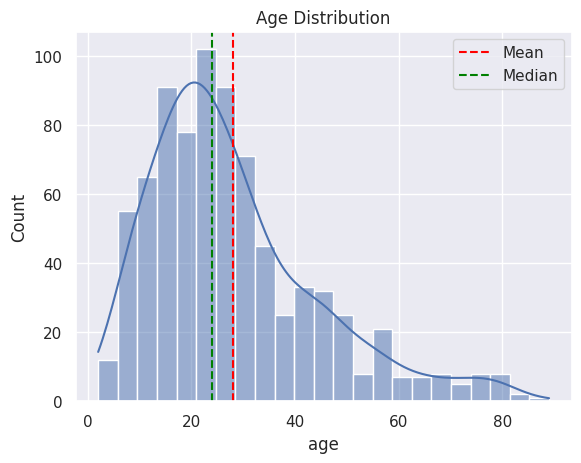

In [ ]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

age_mean = df['age'].mean()
age_median = df['age'].median()

print(f"Mean : {age_mean}")
print(f"Median : {age_median}")

plt.axvline(age_mean, color = 'red', linestyle='--', label = 'Mean')
plt.axvline(age_median, color = 'green', linestyle='--', label = 'Median')

plt.legend()

plt.show()

Mean : 8.537303106501248
Median : 9.605299308


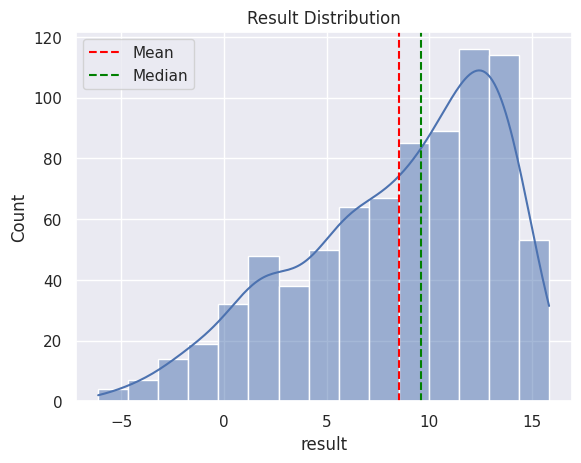

In [ ]:
sns.histplot(df['result'], kde=True)
plt.title('Result Distribution')

result_mean = df['result'].mean()
result_median = df['result'].median()

print(f"Mean : {result_mean}")
print(f"Median : {result_median}")

plt.axvline(result_mean, color = 'red', linestyle='--', label = 'Mean')
plt.axvline(result_median, color = 'green', linestyle='--', label = 'Median')

plt.legend()

plt.show()

# Box Plot

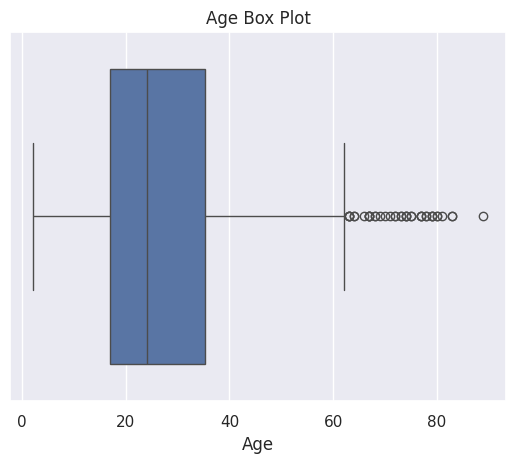

In [ ]:
sns.boxplot(x = df['age'])
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.show()


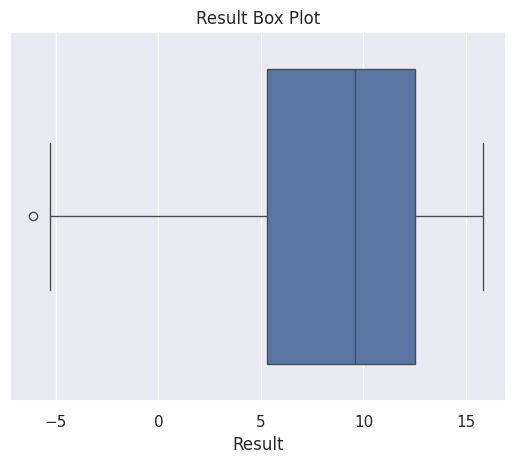

In [ ]:
sns.boxplot(x = df['result'])
plt.title('Result Box Plot')
plt.xlabel('Result')
plt.show()


In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

age_outlier = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]


In [ ]:
len(age_outlier)

39

In [ ]:
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

result_outlier = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]


In [ ]:
len(result_outlier)

1

In [ ]:
df.columns


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

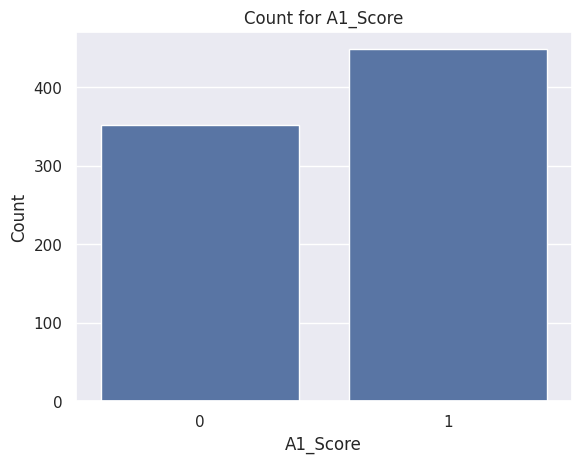

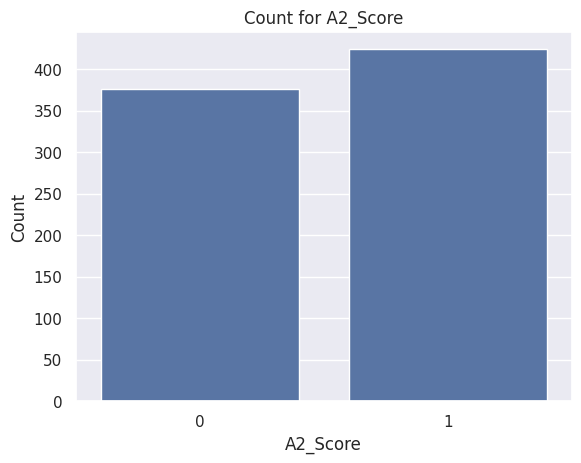

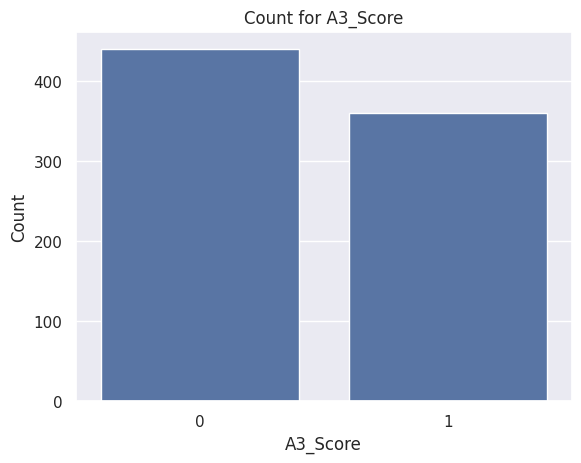

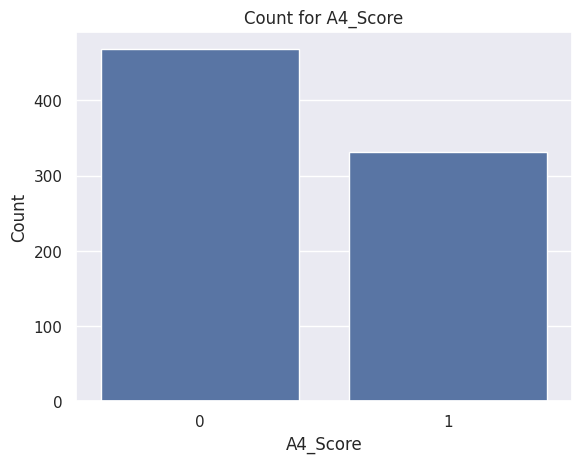

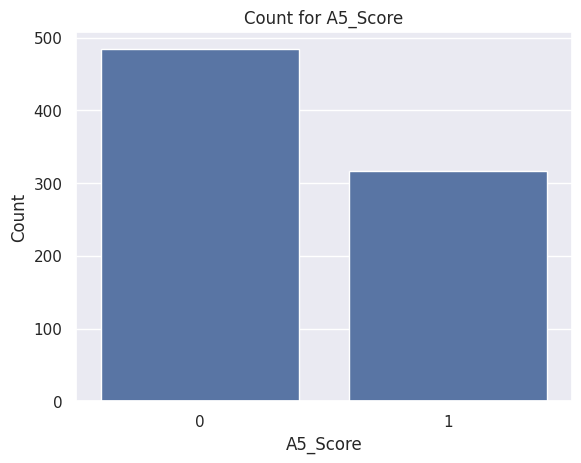

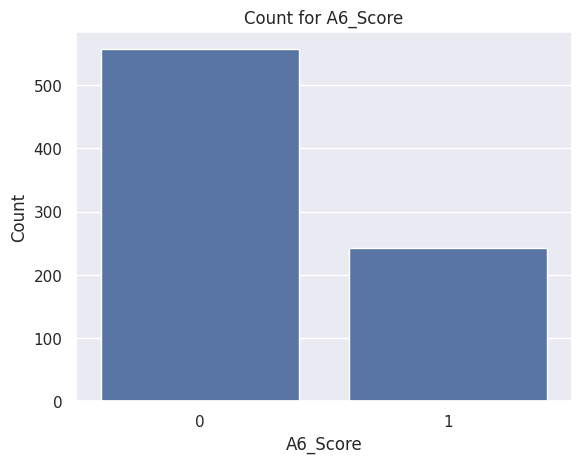

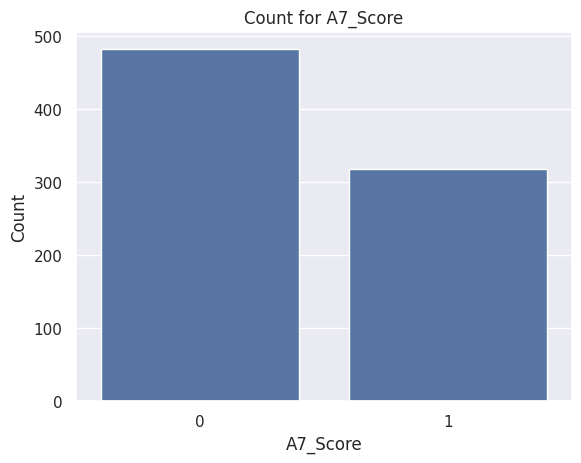

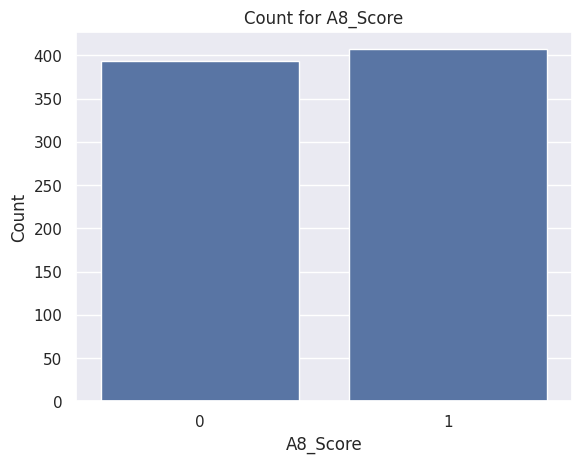

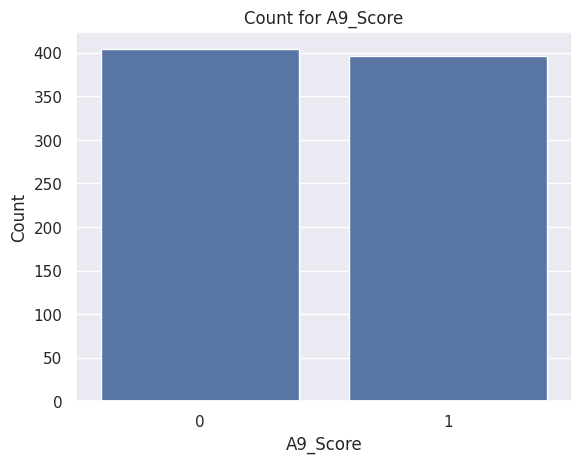

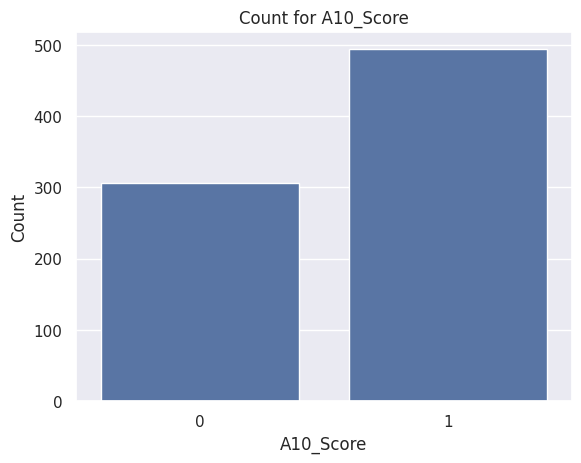

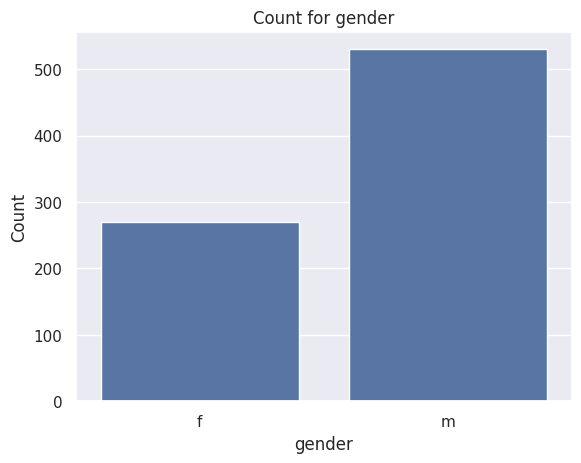

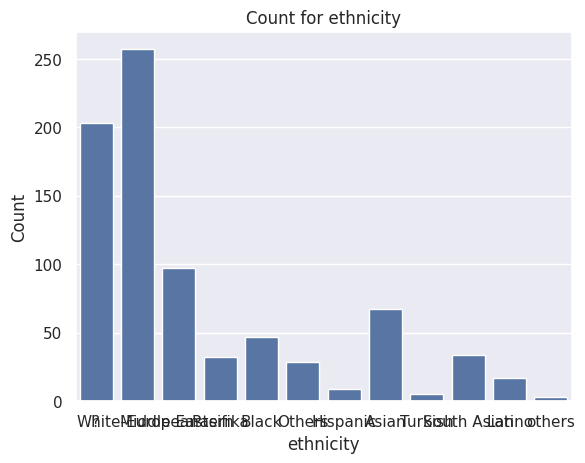

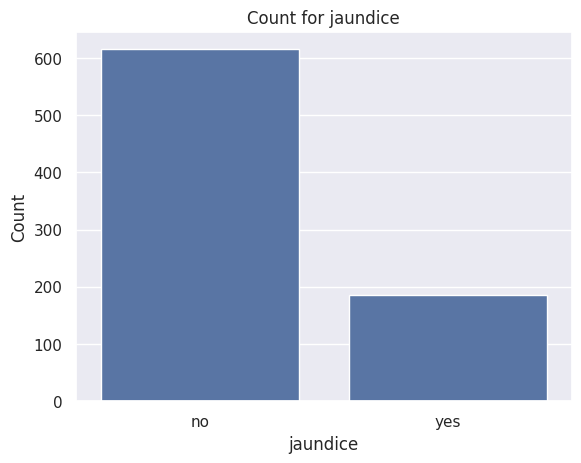

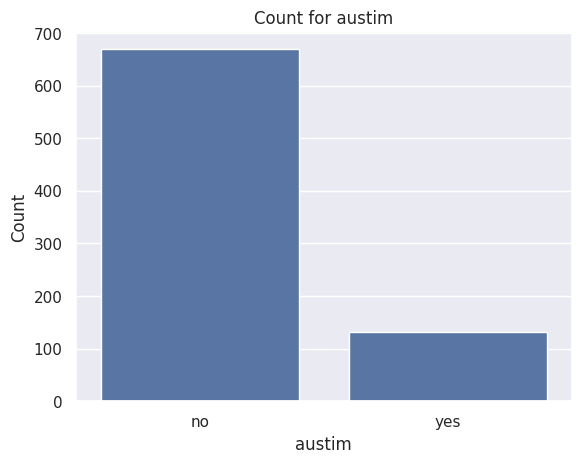

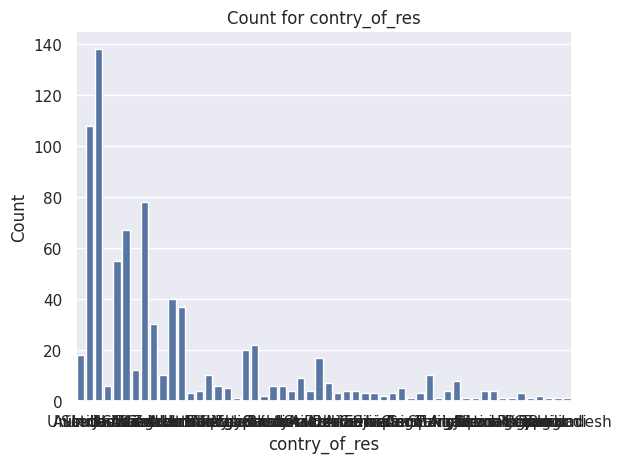

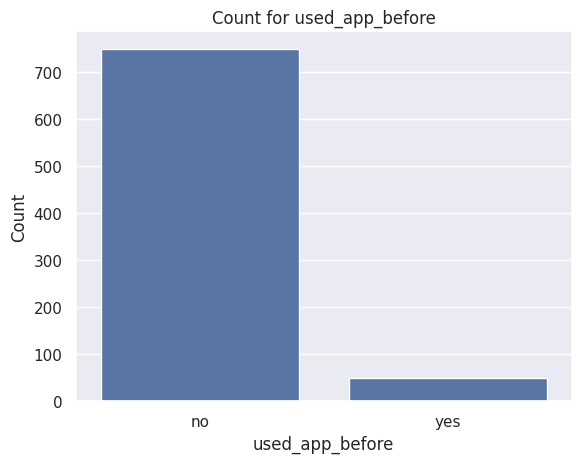

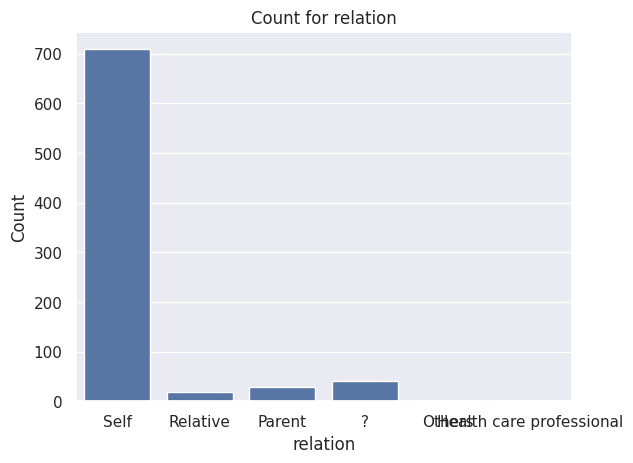

In [ ]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']


for col in categorical_columns:
  sns.countplot(x = df[col])
  plt.title(f'Count for {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

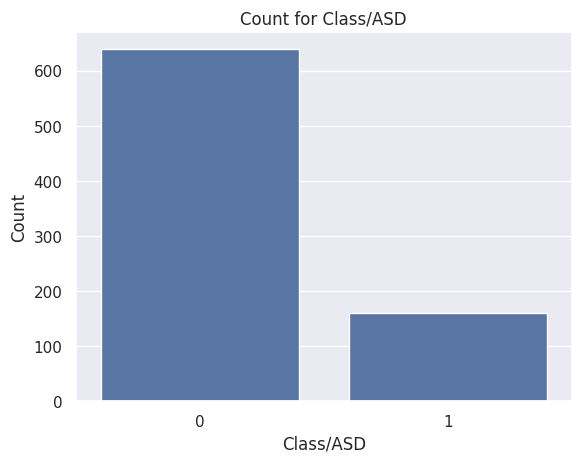

In [ ]:
sns.countplot(x = df['Class/ASD'])
plt.title('Count for Class/ASD')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

In [ ]:
df['ethnicity'] = df['ethnicity'].replace({'?' : 'Others', 'others' : 'Others'})

In [ ]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [ ]:
df['relation'] = df['relation'].replace(
    {'?' : 'Others',
     'Relative' : 'Others',
     'Parent' : 'Others',
     'Health care professional' : 'Others',
     }
)

In [ ]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


# Label Encoding

In [ ]:
object_columns = df.select_dtypes(include='object').columns

In [ ]:
encoders = {}

for col in object_columns:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  encoders[col] = label_encoder

with open('encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

# Correlation Matrix

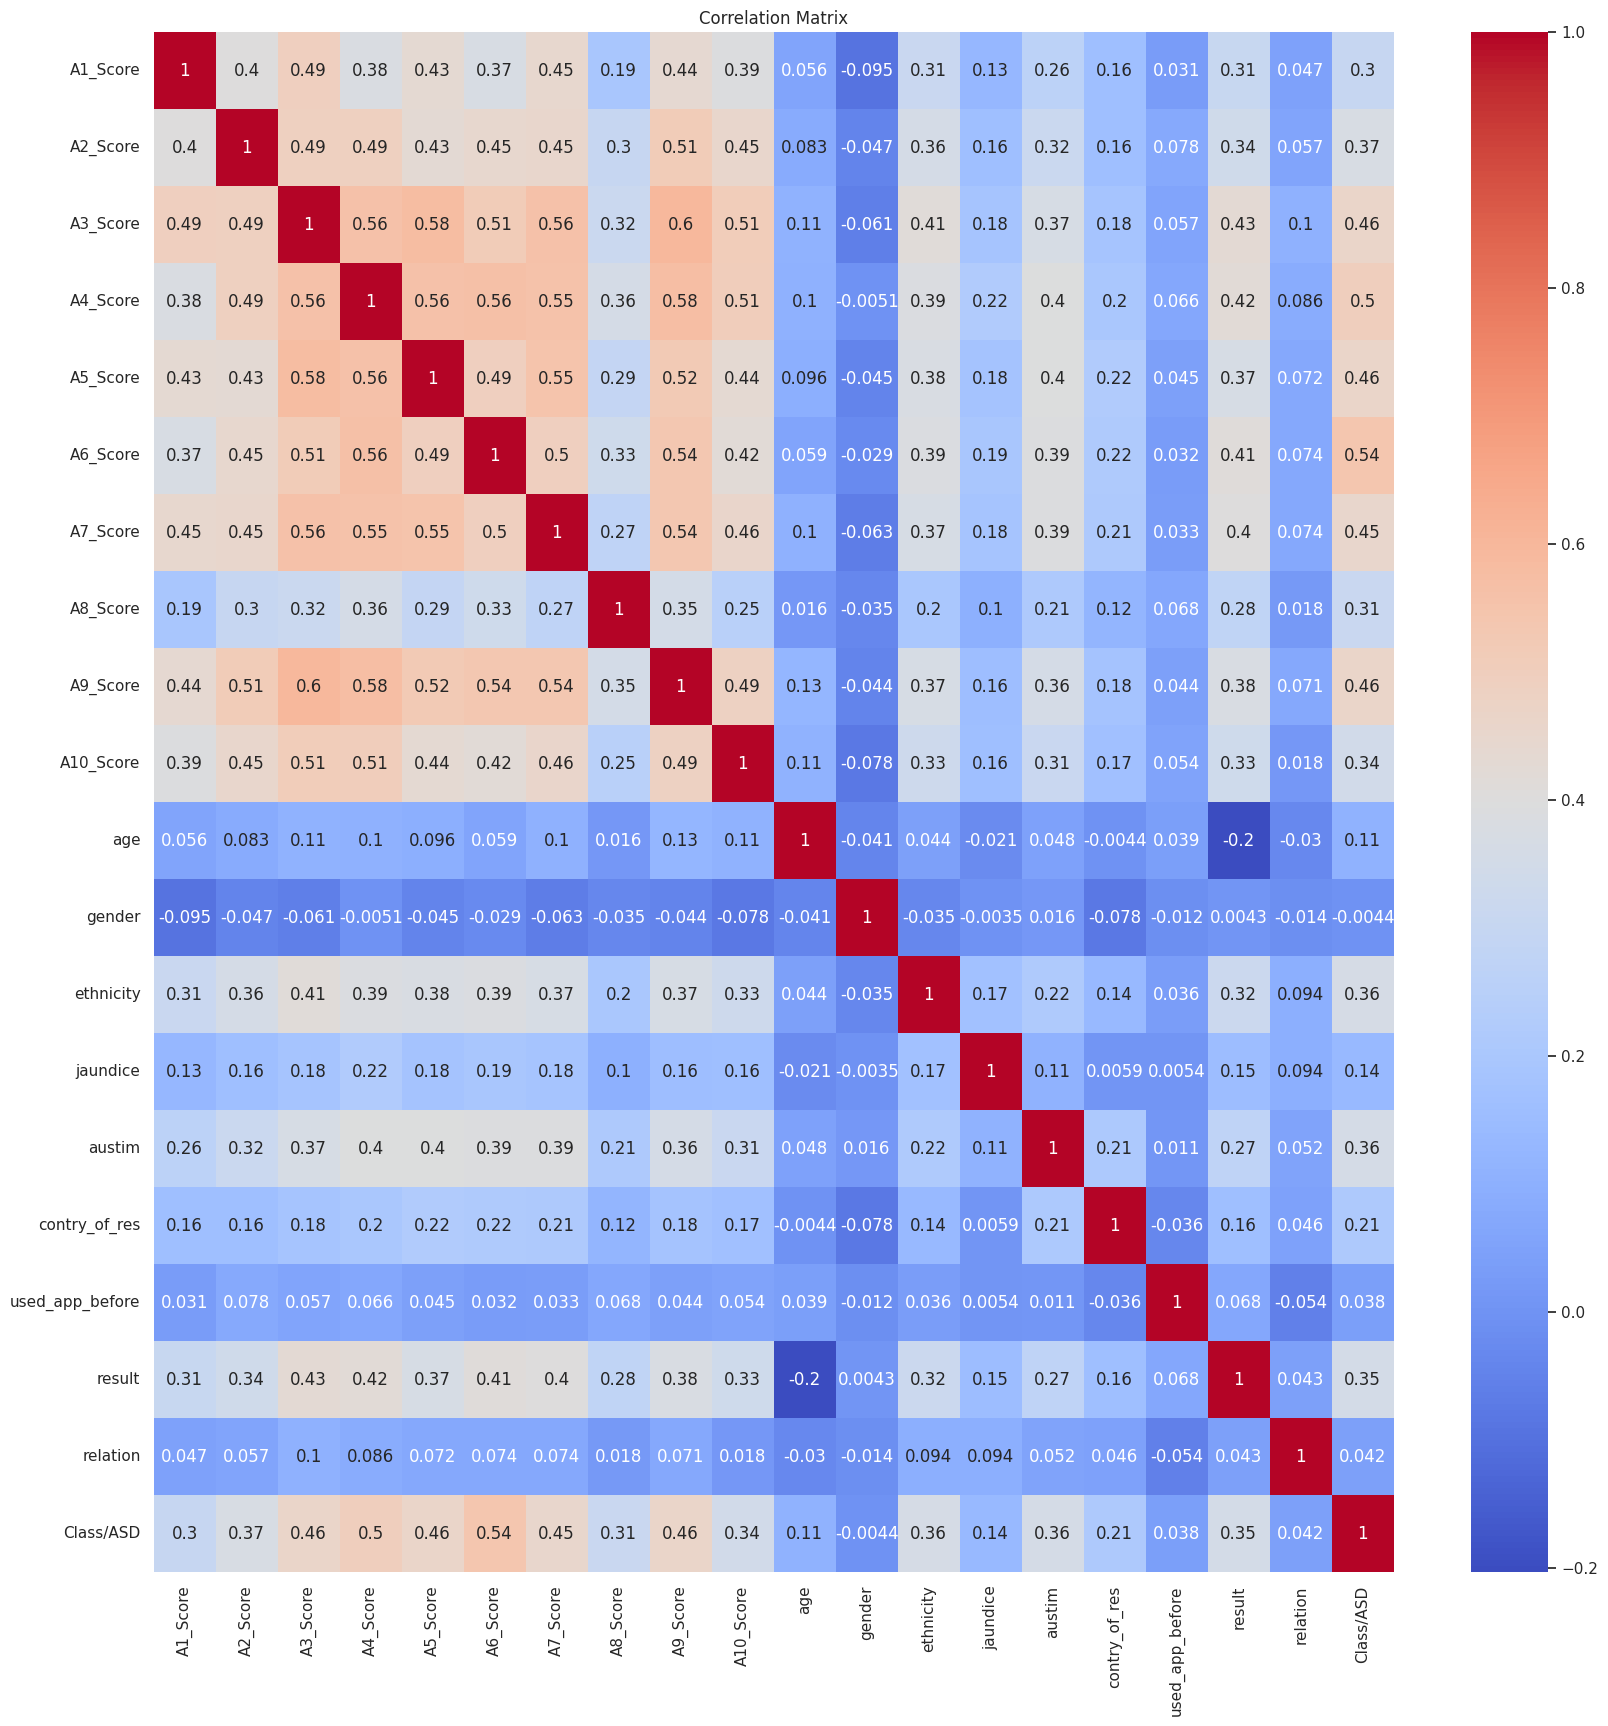

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()


Insights from EDA:-
1. Few outliers in numerical columns
2. Class imbalance in target column and categorical features
3. No highly correlated features
4. Performed label encoding and saved the encoding



# Data Preprocessing

In [ ]:
def outliers_to_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  median = df[column].median()
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [ ]:
df = outliers_to_median(df,'age')
df = outliers_to_median(df,'result')

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
X = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((640, 19), (160, 19), (640,), (160,))

# SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote.shape, y_train_smote.shape

((1030, 19), (1030,))

# Model Training


In [ ]:
models = {
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'XGBoost' : XGBClassifier(random_state=42)
}

In [ ]:
cv_scores = {}

for model_name,model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
  cv_scores[model_name] = scores
  print(f'{model_name} Cross-Validation Accuracy: {np.mean(scores)*100:.2f}')
  print('-'*50)

Training Decision Tree with default parameters
Decision Tree Cross-Validation Accuracy: 85.63
--------------------------------------------------
Training Random Forest with default parameters
Random Forest Cross-Validation Accuracy: 91.94
--------------------------------------------------
Training XGBoost with default parameters
XGBoost Cross-Validation Accuracy: 90.39
--------------------------------------------------


In [ ]:
Decision_tree = DecisionTreeClassifier(random_state=42)
Random_forest = RandomForestClassifier(random_state=42)
XGBoost = XGBClassifier(random_state=42)

In [ ]:
param_grid_DT = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": [None, "sqrt", "log2"],
    "class_weight": [None, "balanced"]
}

param_grid_RF = {
    "n_estimators": [100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True],
    "class_weight": [None, "balanced"]
}

param_grid_XG = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_child_weight": [1, 3],
    "gamma": [0, 0.3],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
    "reg_alpha": [0, 0.1],
    "reg_lambda": [1],
    "scale_pos_weight": [1, 2, 5]

}



In [ ]:
random_search_dt = RandomizedSearchCV(estimator=Decision_tree, param_distributions=param_grid_DT, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator=Random_forest, param_distributions=param_grid_RF, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_xg = RandomizedSearchCV(estimator=XGBoost, param_distributions=param_grid_XG, n_iter=20, cv=5, scoring='accuracy', random_state=42)

In [ ]:
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xg.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8],
                                        'gamma': [0, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [100, 200],
                                        'reg_alpha': [0, 0.1],
                                        'reg_lambda': [1],
                                        'scale_pos_weight': [1, 2, 5],
                                        'subsample': [0.8]},
                   random_state=42, scoring='accuracy')

In [ ]:
print(random_search_dt.best_estimator_)
print(random_search_rf.best_estimator_)
print(random_search_xg.best_estimator_)


DecisionTreeClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [ ]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_

if random_search_xg.best_score_ > best_score:
  best_score = random_search_xg.best_score_
  best_model = random_search_xg.best_estimator_


In [ ]:
print(f'Best Model : {best_model}')
print(f'Best Score : {best_score}')

Best Model : RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', random_state=42)
Best Score : 0.921359223300971


In [ ]:
with open('best_model.pkl', 'wb') as f:
  pickle.dump(best_model, f)

# Evaluation

In [ ]:
y_test_prediction = best_model.predict(X_test)
print('Accuracy score:\n', accuracy_score(y_test, y_test_prediction))
print('\n')
print('Confusion Matric:\n', confusion_matrix(y_test, y_test_prediction))
print('\n')
print('Classification Report:\n', classification_report(y_test, y_test_prediction))

Accuracy score:
 0.83125


Confusion Matric:
 [[108  16]
 [ 11  25]]


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       124
           1       0.61      0.69      0.65        36

    accuracy                           0.83       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.84      0.83      0.83       160

